# Map Folding Algorithm Performance Analysis

Analyze benchmark data from the map folding algorithm implementation.

In [1]:
import numpy
import pandas
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn

# Configure plotting style
seaborn.set_style('whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Load benchmark data
pathBenchmarkFile = Path('marks/benchmarks.npy')
arrayBenchmarks = numpy.load(pathBenchmarkFile, allow_pickle=True)

# Convert to DataFrame
dfBenchmarks = pandas.DataFrame(arrayBenchmarks)

# Add derived columns
dfBenchmarks['dimensionCount'] = dfBenchmarks['dimensions'].apply(lambda x: len(x) if x is not None else 0)
dfBenchmarks['dimensionProduct'] = dfBenchmarks['dimensions'].apply(lambda x: numpy.prod(x) if x is not None else 0)
dfBenchmarks['dimensionsStr'] = dfBenchmarks['dimensions'].apply(lambda x: 'x'.join(map(str, x)) if x is not None else 'None')

## Summary Statistics

In [19]:
print(dfBenchmarks.groupby('dimensionsStr')['time'].describe())
print("Median (seconds):")
print(dfBenchmarks.groupby('dimensionsStr')['time'].median())

from mapFolding.babbage import _sherpa
import inspect
print(inspect.get_annotations(_sherpa))

               count      mean       std       min       25%       50%  \
dimensionsStr                                                            
2x11           101.0  0.241340  0.092246  0.231142  0.231516  0.231806   
2x2x2x2x2      101.0  0.046081  0.000338  0.045737  0.045906  0.045986   
3x3x3          101.0  2.446256  0.009514  2.431507  2.439849  2.444396   
3x8            101.0  1.257732  0.002948  1.252946  1.255789  1.257034   
5x5            101.0  1.462639  0.009385  1.451945  1.456009  1.459512   

                    75%       max  
dimensionsStr                      
2x11           0.232270  1.159094  
2x2x2x2x2      0.046152  0.048005  
3x3x3          2.450602  2.486493  
3x8            1.259054  1.270334  
5x5            1.466069  1.497518  
Median (seconds):
dimensionsStr
2x11         0.231806
2x2x2x2x2    0.045986
3x3x3        2.444396
3x8          1.257034
5x5          1.459512
Name: time, dtype: float64
{}


## Performance by Dimension Configuration

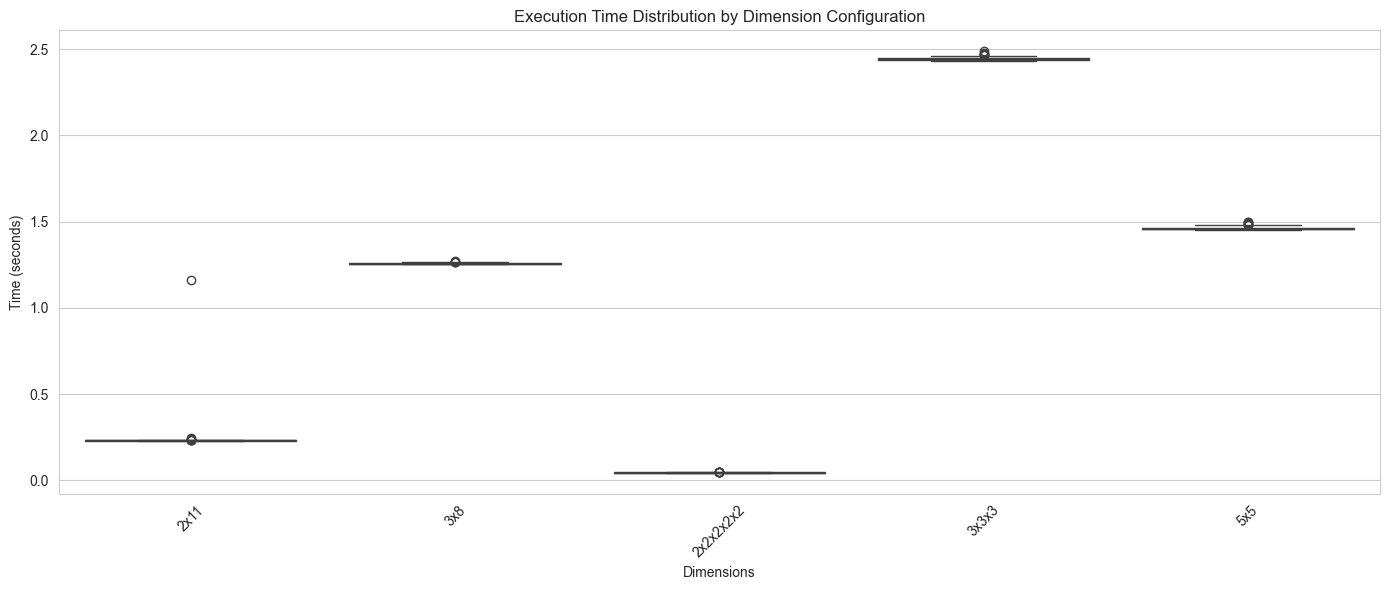

In [3]:
plt.figure(figsize=(14, 6))
seaborn.boxplot(data=dfBenchmarks, x='dimensionsStr', y='time')
plt.xticks(rotation=45)
plt.title('Execution Time Distribution by Dimension Configuration')
plt.xlabel('Dimensions')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

## Task Division Analysis

In [ ]:
# Plot execution time vs tasks for each dimension configuration
plt.figure(figsize=(14, 6))
seaborn.scatterplot(data=dfBenchmarks, x='tasks', y='time', hue='dimensionsStr', style='dimensionsStr')
plt.title('Execution Time vs Tasks by Dimension Configuration')
plt.xlabel('Number of Tasks')
plt.ylabel('Time (seconds)')
plt.legend(title='Dimensions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Scaling Analysis

In [ ]:
plt.figure(figsize=(14, 6))
seaborn.scatterplot(data=dfBenchmarks, x='dimensionProduct', y='time', hue='tasks')
plt.title('Execution Time vs Problem Size')
plt.xlabel('Total Number of Positions (Product of Dimensions)')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.xscale('log')
plt.legend(title='Tasks')
plt.tight_layout()
plt.show()